In [24]:
import datetime as dt
import time

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import seaborn as sns
%matplotlib inline

## The next cell loads data from the John Hopkins github repository on the Corona virus: https://github.com/CSSEGISandData/COVID-19

If you want to run this code, make sure that the paths below are correctly pointing to a copy of the John Hopkins repository.

In [288]:
today = date.today()

## Depending on the flag country_and_region you can decide to view the cumulative data for a country or the individual data for every region.

In [292]:
data_confirmed = pd.read_csv('../COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
data_deaths = pd.read_csv('../COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
data_recovered = pd.read_csv('../COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
data = [data_confirmed, data_deaths, data_recovered]
data_confirmed_orig = data_confirmed.copy()
data_confirmed_orig.fillna('',inplace=True)

#mask = data_confirmed_orig.drop(["Lat","Long"], axis = 1).sum(numeric_only=True, axis=1)>100
for i in range(len(data)):
    #d.loc[d["Province/State"].notna(), "Country/Region"] += ' ' + d.loc[d["Province/State"].notna(), "Province/State"]
    try:
        data[i].drop(["Province/State", "Lat", "Long"] ,axis = 1, inplace=True)
        data[i]=data[i].groupby('Country/Region').sum()
    except KeyError:
        pass
    cols = data[i].columns
    new_cols = map(lambda x: dt.date(2020,*[int(x.split('/')[k]) for k in [0,1]]), cols)
    #d.drop([i for i in range(d.shape[0]) if mask[i]!=True], inplace=True) #Drops countries with less than 100 cases
    data[i].set_axis(list(new_cols), axis=1, inplace=True)
    data[i].reset_index(inplace=True)
    if i == 0:
        small_infection_number = [j for j in range(data[0].shape[0]) if data[0].iloc[j,-1]<200]
    data[i].drop(small_infection_number,inplace=True)
    data[i].reset_index(inplace=True)
    data[i].drop('index',axis=1,inplace=True)
    #d.set_axis(range(len(d.index)), axis=0, inplace=True)

In [293]:
data[0]

,Country/Region,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,...,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29
0,Albania,0,0,0,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
1,Algeria,0,0,0,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
2,Andorra,0,0,0,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
3,Argentina,0,0,0,0,0,0,0,0,0,...,128,158,266,301,387,387,502,589,690,745
4,Armenia,0,0,0,0,0,0,0,0,0,...,136,160,194,235,249,265,290,329,407,424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,US,1,1,2,2,5,5,5,5,5,...,19100,25489,33276,43847,53740,65778,83836,101657,121478,140886
82,Ukraine,0,0,0,0,0,0,0,0,0,...,29,47,73,73,97,145,196,310,356,475
83,United Arab Emirates,0,0,0,0,0,0,0,4,4,...,140,153,153,198,248,333,333,405,468,570
84,United Kingdom,0,0,0,0,0,0,0,0,0,...,4014,5067,5745,6726,8164,9640,11812,14745,17312,19780


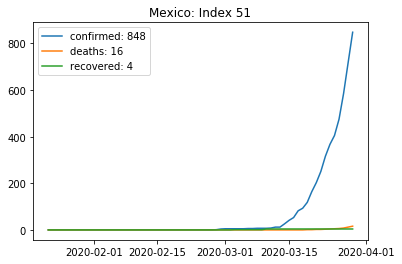

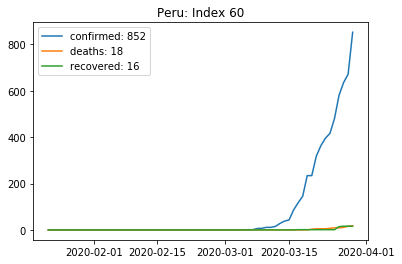

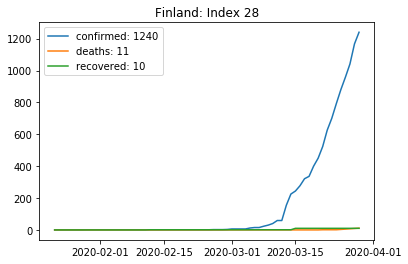

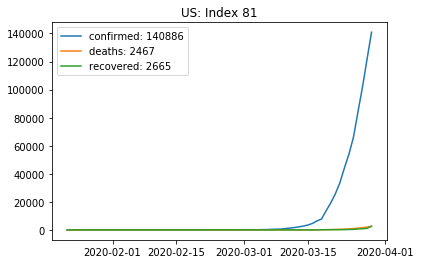

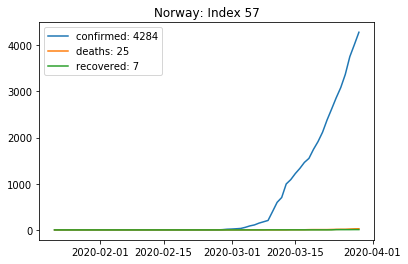

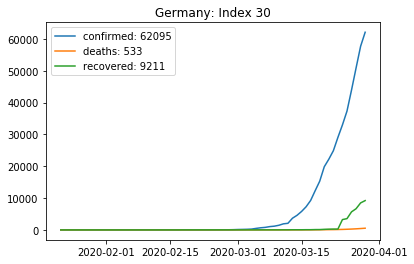

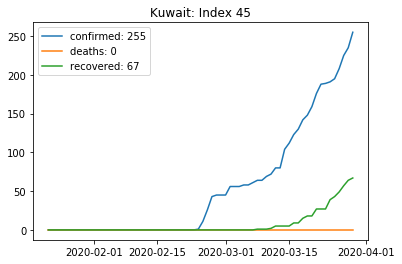

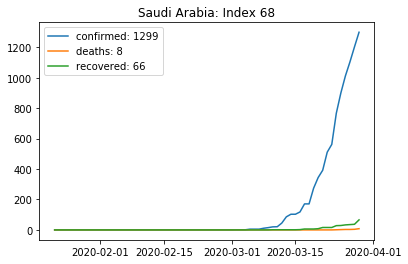

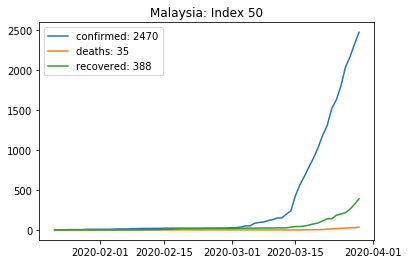

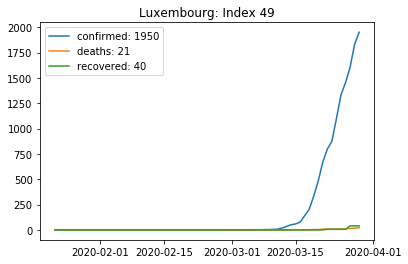

In [294]:
sample_size = 10
sample = random.sample(range(data[0].shape[0]),sample_size)
for index in sample:
    country = data[0].iloc[index][0]
    df = pd.DataFrame([d.iloc[index][1:] for d in data], index=[0,1,2]).fillna(0)
    total = df.iloc[:,-1]
    df.set_axis(["confirmed: {}".format(total.loc[0]),"deaths: {}".format(total[1]),"recovered: {}".format(total[2])], inplace=True, axis=0)
    df.transpose().plot(title=country + ': Index {}'.format(index))


In [295]:
L = ["Austria", "Ireland", "Germany", "Italy", "US"]

In [329]:
start_date+dt.timedelta(1)

datetime.date(2020, 3, 16)

Austria
Latest available data from date 2020-03-29: 8788
Reg score 0.9828293685140527
Reg coeff [[0.17298679]]
Intercept [6.87489064]
Prediction for 2020-03-29:  [[10902.04557882]]
Actual value:  6    8788.0
Name: 2020-03-29, dtype: float64
Prediction for 2020-03-30:  [[12960.90127039]]
Ireland
Latest available data from date 2020-03-29: 2615
Reg score 0.956032758761935
Reg coeff [[0.21567797]]
Intercept [5.1432076]
Prediction for 2020-03-29:  [[3507.64174]]
Actual value:  38    2615.0
Name: 2020-03-29, dtype: float64
Prediction for 2020-03-30:  [[4351.940839]]
Germany
Latest available data from date 2020-03-29: 62095
Reg score 0.9766851594869448
Reg coeff [[0.16638535]]
Intercept [8.86910769]
Prediction for 2020-03-29:  [[73021.02192352]]
Actual value:  30    62095.0
Name: 2020-03-29, dtype: float64
Prediction for 2020-03-30:  [[86239.88085004]]
Italy
Latest available data from date 2020-03-29: 97689
Reg score 0.9801159476772936
Reg coeff [[0.09936587]]
Intercept [10.20244489]
Predict

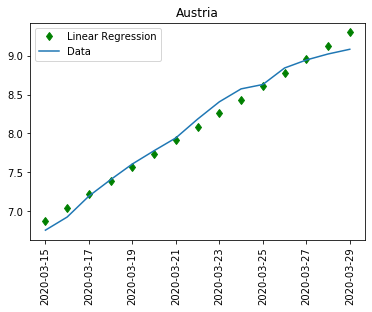

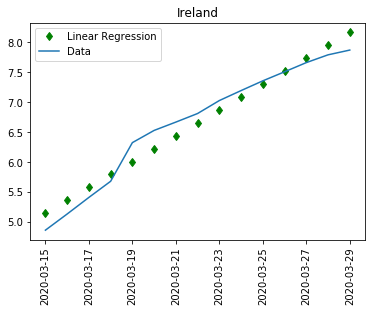

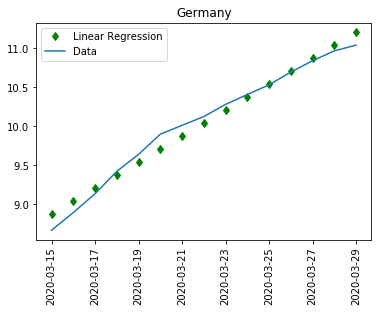

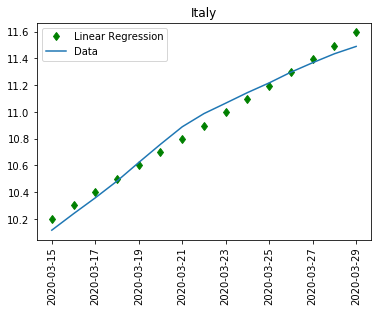

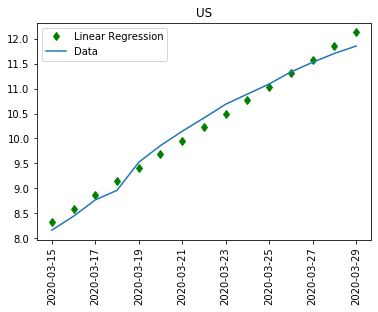

In [332]:
from sklearn.linear_model import LinearRegression
#import statsmodels.formula.api as sm
for country in L:
    y = data[0].loc[data[0]["Country/Region"]==country].iloc[:,1:].transpose()
    start_date = dt.date(2020,3,15)
    y = y.loc[start_date:today]
    y = y[y!=0].dropna().apply(np.log)
    #y = y.append(pd.Series({y.columns[0]:np.log(newest_data[country])}, name=pd.datetime(20,3,17)))
    X = np.array(range(y.shape[0])).reshape(-1,1)
    reg = LinearRegression()
    reg.fit(X,y)
    print(country)
    print('Latest available data from date {}: {}'.format(data[0].columns[-1], data[0].loc[data[0]["Country/Region"]==country].iloc[0,-1]))
    print('Reg score', reg.score(X, y))
    print('Reg coeff', reg.coef_)
    print('Intercept', reg.intercept_)
    plt.figure()
    plt.plot(y.index,(reg.predict(X)), 'gd', label='Linear Regression')
    plt.plot(y.index, (np.array(y)), label='Data')
    plt.title(country)
    plt.legend(loc="best")
    plt.xticks(rotation='vertical')
    print('Prediction for {}: '.format(data[0].columns[-1]), np.exp(reg.predict((X[-1]).reshape(-1,1))))
    print('Actual value: ', np.exp(y.iloc[-1]))
    print('Prediction for {}: '.format(data[0].columns[-1]+dt.timedelta(1)), np.exp(reg.predict((X[-1]+1).reshape(-1,1))))
    
    #reg.predict(np.array([[3, 5]]))
